# PyPlot

In [255]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['lines.markeredgewidth'] = 1

In [256]:
# import files
file = "./Resources/city_data.csv"
file2 = "./Resources/ride_data.csv"

In [257]:
# Merged files
city_data = pd.read_csv(file)
ride_data = pd.read_csv(file2)

combined_df = pd.merge(city_data, ride_data, how='outer', on='city')
combined_df.head()

# group by city name ------------
city_info = combined_df.groupby("city").sum()
city_name = combined_df["city"].unique()

# ride count ---------------
rider_count = combined_df.groupby("city").count()
# city_info["ride_id"]

# average fare count -----------------
fare_count = city_info["fare"]/rider_count["ride_id"]

# driver count --------------
drivers = city_info["driver_count"]

# Variables for plots:
city = sorted(city_name)
ride_count = [x for x in rider_count]
# avg_fare = [x for x in fare_count]
driver_count = [x for x in drivers]

fare = fare_count.to_frame()
fare.columns = ["fare"]

# urban, suburban, rural -----
city_area = combined_df.groupby(["city","type"]).count()

# city_area.index.get_level_values("type")

bubble_info = pd.DataFrame(
        {   "City": [x for x in sorted(city_name)],
            "Ride Count": [x for x in rider_count["ride_id"]],
            "Average Fare": [x for x in fare["fare"]],
            "Driver Count": [x for x in drivers],
            "Area": [x for x in city_area.index.get_level_values("type")]
        }
    )
bubble_info[["City","Ride Count", "Average Fare", "Driver Count","Area"]]

new_bubble_info = bubble_info.set_index(['City'])

del new_bubble_info.index.name
new_bubble_info.head()


,Area,Average Fare,Driver Count,Ride Count
Alvarezhaven,Urban,23.928710,651,31
Alyssaberg,Urban,20.609615,1742,26
Anitamouth,Suburban,37.315556,144,9
Antoniomouth,Urban,23.625000,462,22
Aprilchester,Urban,21.981579,931,19


# Bubble Plot

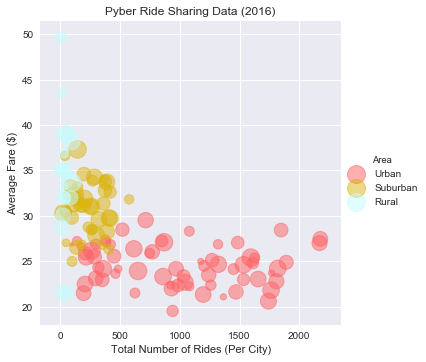

In [258]:
#make dots expand according to ride count
size = [x*10 for x in bubble_info["Ride Count"]]

#plot with seaborn 
color = ["#ff6163","#dbb40c",  "#c6fcff"]


g = sns.lmplot(x='Driver Count', y='Average Fare', hue="Area", palette=sns.color_palette(color), 
           scatter_kws={"s": size, 'alpha':0.5}, data=bubble_info,  fit_reg=False          
          )

sns.plt.title('Pyber Ride Sharing Data (2016)')

g.set(xlabel='Total Number of Rides (Per City)', ylabel='Average Fare ($)')

plt.show()



# Percent of Total Fares By City Type

In [259]:
fares_by_city = combined_df.groupby("type").sum()

#total number of drivers -- testing
# fares_by_city["driver_count"].sum()
# fares_by_city[["driver_count"]]

total_fares_city = pd.DataFrame(
        {   "City": [x for x in fares_by_city.index],
            "Percentage of Fares": [x for x in fares_by_city["driver_count"]/fares_by_city["driver_count"].sum() * 100],
        }
    )
total_fares_city[["City","Percentage of Fares"]]

new_total_fares_city = total_fares_city.set_index(['City'])

del new_total_fares_city.index.name
new_total_fares_city.head()


,Percentage of Fares
Rural,0.969876
Suburban,12.980602
Urban,86.049521


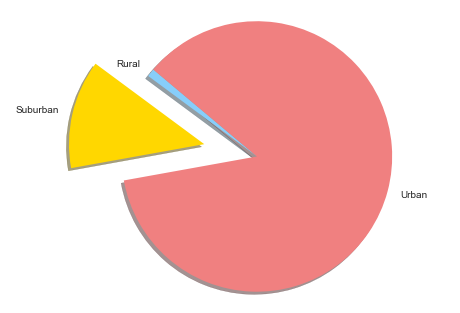

In [260]:
labels = total_fares_city["City"]
colors = ["lightskyblue", "gold", "lightcoral"]
percentage = total_fares_city["Percentage of Fares"]
explode = (0, 0.4, 0)
plt.pie(percentage, labels=labels, colors=colors,explode=explode,
         shadow=True, startangle=140)
plt.axis("equal")
plt.show()

# Percent of Total Rides By City Type

In [261]:
fares_by_city = combined_df.groupby("type").count()
fares_by_city

#total number of drivers -- testing
fares_by_city["driver_count"].sum()
fares_by_city[["driver_count"]]

total_fares_city = pd.DataFrame(
        {   "City": [x for x in fares_by_city.index],
            "Percentage of Rides": [x for x in fares_by_city["driver_count"]/fares_by_city["driver_count"].sum() * 100],
        }
    )
total_fares_city[["City","Percentage of Rides"]]

new_total_fares_city = total_fares_city.set_index(['City'])

del new_total_fares_city.index.name
new_total_fares_city.head()


,Percentage of Rides
Rural,5.193187
Suburban,27.295388
Urban,67.511425


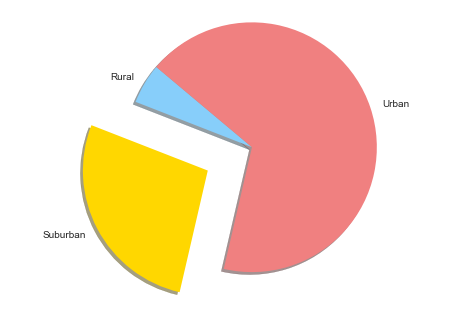

In [262]:
labels = total_fares_city["City"]
colors = ["lightskyblue", "gold", "lightcoral"]
percentage = total_fares_city["Percentage of Rides"]
explode = (0, 0.4, 0)
plt.pie(percentage, labels=labels, colors=colors,explode=explode,
         shadow=True, startangle=140)
plt.axis("equal")
plt.show()

# Percent of Total Drivers By City Type

In [266]:
fares_by_city = combined_df.groupby("type").count()

combined_df[["type","ride_id"]]
data = combined_df.groupby('type')["ride_id"].unique()
data2 = data.to_frame()




# combined_df["ride_id"].value_counts().to_frame()

#total number of drivers -- testing
# fares_by_city["driver_count"].sum()
# fares_by_city[["driver_count"]]

#filtered driver count
total_driver_count = len(data2["ride_id"][0]) + len(data2["ride_id"][1]) + len(data2["ride_id"][2]) #1625

##fix VV
total_drivers_city = pd.DataFrame(
        {    "Percentage of Drivers": [len(data2["ride_id"][0])/total_driver_count * 100,
                                       len(data2["ride_id"][1])/total_driver_count * 100,
                                       len(data2["ride_id"][2])/total_driver_count * 100
                                        ],
            "City": [x for x in fares_by_city.index]
           
        }
    )
total_drivers_city[["City","Percentage of Drivers"]]

new_total_drivers_city = total_drivers_city.set_index(['City'])

del new_total_drivers_city.index.name
new_total_drivers_city.head()



,Percentage of Drivers
Rural,5.263158
Suburban,26.315789
Urban,68.421053


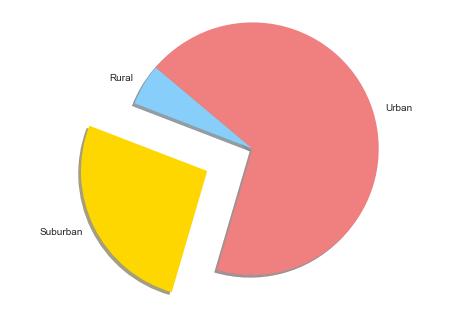

In [265]:
labels = total_fares_city["City"]
colors = ["lightskyblue", "gold", "lightcoral"]
percentage = total_fares_city["Percentage of Drivers"]
explode = (0, 0.4, 0)
plt.pie(percentage, labels=labels, colors=colors,explode=explode,
         shadow=True, startangle=140)
plt.axis("equal")
plt.show()